<a id="top"></a> <br>

# Table of Contents

> [1. Import Libraries](#1)
> 
> [2. Load Data](#2)
> 
> [3. Data Splitting](#3)
> 
> [4. Text Preprocessing](#4)
> 
> [5. Model](#5)
> 
> * [5.1 BOW](#5.1)
> 
>  * [5.1.1 Text Preparation for BOW](#5.1.1)
> 
>  * [5.1.2 Building Model](#5.1.2)
> 
>  * [5.1.3 Training VS Validation](#5.1.3)
>
>  * [5.1.4 Save Model](#5.1.4)
> 
>  * [5.1.5 Save Performance](#5.1.5)
> 
> * [5.2 BOW Vectors](#5.2)
> 
>  * [5.2.1 Building Model](#5.2.1)
> 
>  * [5.2.2 Training VS Validation](#5.2.2)
>
>  * [5.2.3 Save Model](#5.2.3)
> 
>  * [5.2.4 Save Performance](#5.2.4)
> 
> * [5.3 LSTM](#5.3)
>  
>  * [5.3.1 Building Model](#5.3.1)
>  
>  * [5.3.2 Training VS Validation](#5.3.2)
>
>  * [5.3.3 Save Model](#5.3.3)
> 
>  * [5.3.4 Save Performance](#5.3.4)
>
> * [5.4 GRU](#5.4)
>  
>  * [5.4.1 Building Model](#5.4.1)
>  
>  * [5.4.2 Training VS Validation](#5.4.2)
>
>  * [5.4.3 Save Model](#5.4.3)
> 
>  * [5.4.4 Save Performance](#5.4.4)
>
> [6. Evaluation](#6)
>
> [7. Submission File Generation](#7)

<a id="1"></a> <br>
# 1. Import Libraries

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<a id="2"></a> <br>

# 2. Download Data
([Go to top](#top))

In [2]:
# username = 'mosobhy'
# key = ''

# if '.kaggle' not in os.listdir('/root'):
#   !mkdir ~/.kaggle

# !touch ~/.kaggle/kaggle.json
# !chmod 666 ~/.kaggle/kaggle.json

# with open('/root/.kaggle/kaggle.json', 'w') as file:
#   file.write('{"username":"%s","key":"%s"}' % (username, key))

# !chmod 600 ~/.kaggle/kaggle.json

In [3]:
# !cat ~/.kaggle/kaggle.json

In [4]:
# !kaggle competitions download -c nlp-getting-started

In [5]:
# !unzip /content/nlp-getting-started.zip -d /content/
# !rm /content/nlp-getting-started.zip

<a id="3"></a> <br>

# 3. Load Data
([Go to top](#top))

In [6]:
train_df = pd.read_csv('/content/train.csv')
train_df.shape

(7613, 5)

In [7]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


For training our deep learning model, we will use the 'text' column as our input feature or `X_train`, and the 'target' column as our output or `y_train`. Any other columns that are not required will be dropped as we are only interested in the 'text' column.

In [8]:
X_train_raw = train_df['text'].values

In [9]:
X_train_raw.shape

(7613,)

In [10]:
X_train_raw[5]

'#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'

In [11]:
_ = list(map(print, X_train_raw[:5]+'\n'))

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all

Forest fire near La Ronge Sask. Canada

All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected

13,000 people receive #wildfires evacuation orders in California 

Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 



In [12]:
y_train = train_df['target'].values

In [13]:
y_train.shape

(7613,)

In [14]:
y_train[:5]

array([1, 1, 1, 1, 1])

<a id="4"></a> <br>

# 4. Data Splitting
([Go to top](#top))

As we see there's a little bit class imbalance, so we'll use `stratify` parameter with `train_test_split`.

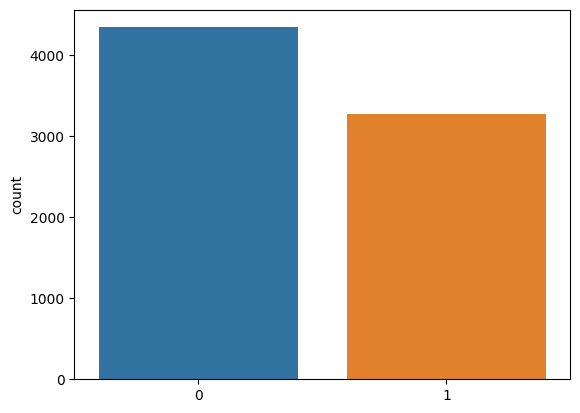

In [15]:
_ = sns.countplot(x=y_train)

In [16]:
from sklearn.model_selection import train_test_split

X_train_raw, X_validation_raw, y_train, y_validation = train_test_split(X_train_raw, y_train, test_size=0.2, stratify=y_train)

print(X_train_raw.shape)
print(y_train.shape)
print()
print(X_validation_raw.shape)
print(y_validation.shape)

(6090,)
(6090,)

(1523,)
(1523,)


<a id="5"></a> <br>

# 5. Text Preprocessing
([Go to top](#top))

In this phase, we apply some operations on the text, to make it in the most usable form for the task at hand. Mainly we clean it up to be more appealing to the problem we try to solve. The input is __text__ and the output is a transformed __text__.

In [17]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text(text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [18]:
X_train_clean = X_train_raw.copy()
X_validation_clean = X_validation_raw.copy()

X_train_clean = list(map(normalize_text, X_train_clean))
X_validation_clean = list(map(normalize_text, X_validation_clean))

# X_train_clean

<a id="6"></a> <br>

# 6. Model
([Go to top](#top))

In [19]:
evaluation_df = pd.DataFrame()
models_dict = {}

<a id="6.1"></a> <br>
## 6.1 BOW

<a id="6.1.1"></a> <br>

##### Text Preparation for BOW

In [20]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_clean)
X_validation = vectorizer.transform(X_validation_clean)

In [21]:
# vectorizer.vocabulary_

In [22]:
X_train = X_train.toarray()
X_validation = X_validation.toarray()

In [23]:
print(X_train.shape)
print(X_validation.shape)

(6090, 16172)
(1523, 16172)


<a id="6.1.2"></a> <br>

##### Building Model

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                258768    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 259,057
Trainable params: 259,057
Non-trainable params: 0
_________________________________________________________________


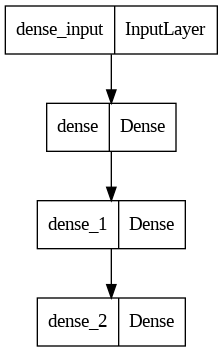

In [26]:
from keras.utils import plot_model
plot_model(model)

In [27]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_validation, y_validation))

Epoch 1/20
12/12 [==============================] - 7s 303ms/step - loss: 0.6712 - accuracy: 0.7117 - val_loss: 0.6482 - val_accuracy: 0.7722
Epoch 2/20
12/12 [==============================] - 2s 208ms/step - loss: 0.5999 - accuracy: 0.8580 - val_loss: 0.6045 - val_accuracy: 0.7833
Epoch 3/20
12/12 [==============================] - 2s 192ms/step - loss: 0.5268 - accuracy: 0.8877 - val_loss: 0.5682 - val_accuracy: 0.7807
Epoch 4/20
12/12 [==============================] - 2s 207ms/step - loss: 0.4583 - accuracy: 0.9033 - val_loss: 0.5379 - val_accuracy: 0.7859
Epoch 5/20
12/12 [==============================] - 3s 303ms/step - loss: 0.3958 - accuracy: 0.9140 - val_loss: 0.5158 - val_accuracy: 0.7787
Epoch 6/20
12/12 [==============================] - 3s 210ms/step - loss: 0.3410 - accuracy: 0.9228 - val_loss: 0.5015 - val_accuracy: 0.7735
Epoch 7/20
12/12 [==============================] - 3s 221ms/step - loss: 0.2940 - accuracy: 0.9312 - val_loss: 0.4940 - val_accuracy: 0.7741
Epoch 

<a id="6.1.3"></a> <br>

##### Training VS Validation

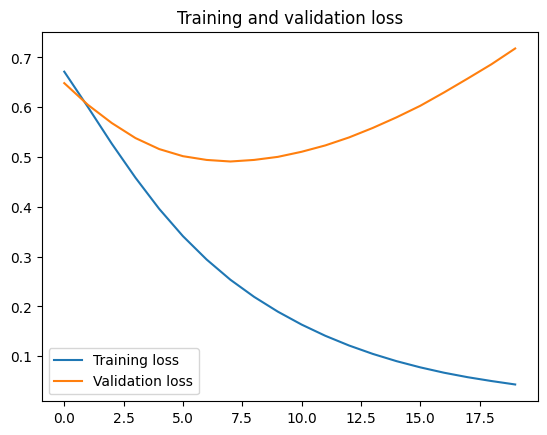

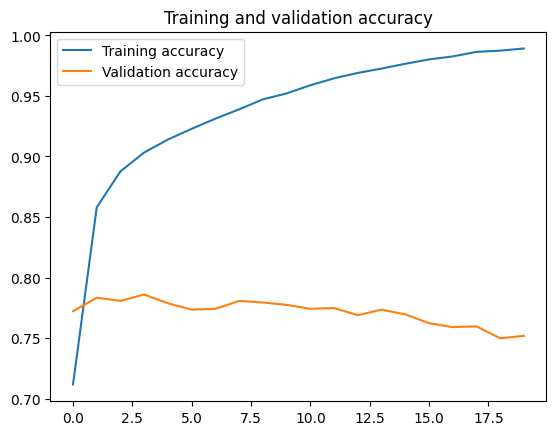

In [29]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

<a id="6.1.4"></a> <br>

##### Save Model

In [30]:
model.save('/content/bow.h5')

<a id="6.1.5"></a> <br>

##### Save Performance

In [31]:
model_name = 'BOW'
models_dict[model_name] = '/content/bow.h5'

train_loss, train_accuracy = model.evaluate(X_train, y_train)
validation_loss, validation_accuracy = model.evaluate(X_validation, y_validation)

evaluation = pd.DataFrame({
                          'Model' : [model_name],
                          'Train' : [train_accuracy],
                          'Validation' : [validation_accuracy]
                        })

evaluation_df = pd.concat([evaluation_df, evaluation], ignore_index=True)

48/48 [==============================] - 0s 6ms/step - loss: 0.7178 - accuracy: 0.7518


<a id="6.2"></a> <br>

## 6.2 BOW Vectors


<a id="6.2.1"></a> <br>

##### Text Preparation for BOW Vectors

In [32]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_clean)
vocab_size = len(tokenizer.word_index) + 1

In [33]:
# integer encode the documents
train_encoded_docs = tokenizer.texts_to_sequences(X_train_clean)
validation_encoded_docs = tokenizer.texts_to_sequences(X_validation_clean)

In [34]:
print(train_encoded_docs)

[[7, 1074, 1075, 93, 1148, 1076, 32, 1733, 1149, 991, 104, 3203, 4709, 4710], [45, 6, 48, 2478, 66, 2, 30, 31, 107, 124, 710, 30, 64, 270], [3204, 114, 143, 137, 3, 762, 198, 3205], [3206, 308, 642, 369, 3207, 19, 450, 4711], [125, 9, 125, 9, 37, 862, 474, 198, 9, 475, 26, 49, 608], [2, 72, 17, 4712, 923, 105, 4713, 1517, 510], [149, 4714, 1518, 5, 60, 1371, 3208], [430, 4715, 4716, 144, 76, 67, 4717, 1245, 809, 451, 223], [67, 4718, 1519, 2024, 476, 643, 279, 130, 4719, 4720], [763, 3209, 38, 255, 496], [4721, 1734, 4722, 87, 70, 4723, 4724], [62, 115, 121, 80, 15, 224, 1735, 1372, 138, 242, 88, 1736, 452, 1520], [3210, 863, 4725, 2025, 3211, 810, 4726], [4727], [431, 577, 2479, 256, 292, 43, 8, 4728, 4729], [643, 644, 679, 432, 165, 344, 924, 4730], [4731, 4732, 4733, 433, 2026, 4734, 2026, 3212, 1246, 680, 4735, 3213, 811, 4736, 215], [166, 166, 6, 370, 4737, 91, 4738, 4739], [175, 280, 26, 711, 2027, 2480, 167, 188, 3214, 1150, 91], [812, 199, 1247, 925, 681, 324, 4740, 4741], [474

Determine the optimal maximum padding length

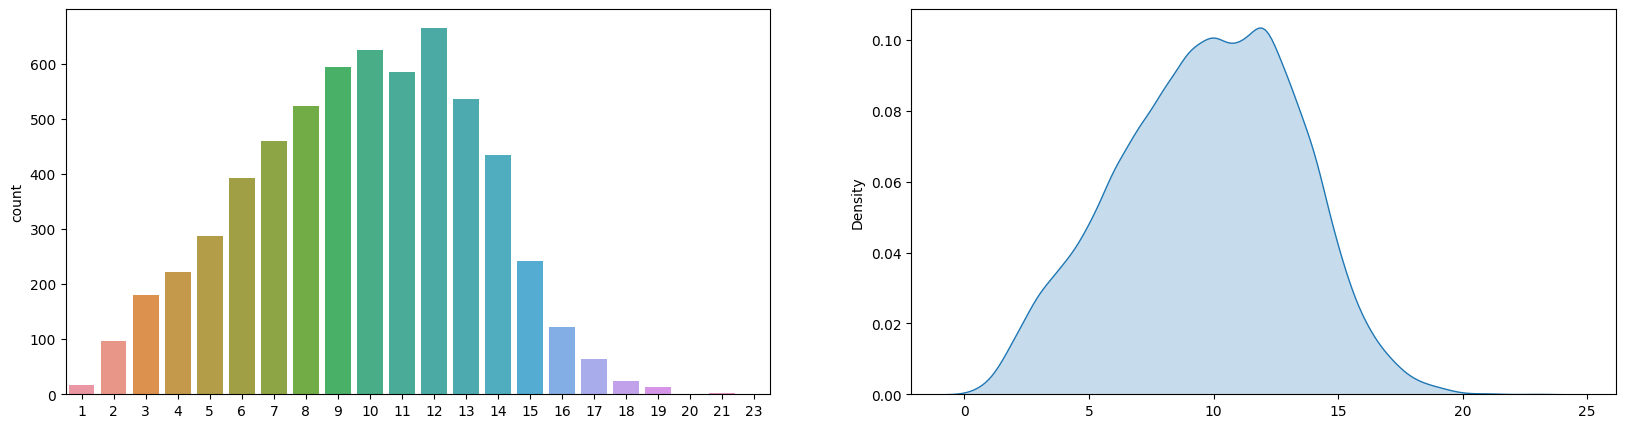

In [35]:
figure, subplots = plt.subplots(1, 2, figsize=(20, 5))
_ = sns.countplot(x=list(map(len, train_encoded_docs)), ax=subplots[0])
_ = sns.kdeplot(list(map(len, train_encoded_docs)), fill=True, ax=subplots[1])

In [36]:
from statistics import mode
train_encoded_docs_length = list(map(len, train_encoded_docs))
mode(train_encoded_docs_length)

12

As we see the most frequent value in the histogram (mode) = 12.

If we set the max padding length to be equal to the most frequent value in the histogram (mode = 12), let's see how many sentences we can get rid of.

In [37]:
len(list(filter(lambda x: x>=mode(train_encoded_docs_length), train_encoded_docs_length)))

2106

In [38]:
len(train_encoded_docs_length)

6090

We will lose around 34% of the data (6090 tweets). 

In [39]:
round(len(list(filter(lambda x: x>=mode(train_encoded_docs_length), train_encoded_docs_length))) / len(train_encoded_docs_length)*100, 2)

34.58

That's why we will set the max padding length to be equal to the length of the longest tweet.

In [40]:
max(train_encoded_docs_length)

23

In [41]:
max_length = max(train_encoded_docs_length)
train_padded_docs = pad_sequences(train_encoded_docs, maxlen=max_length, padding='post')
validation_padded_docs = pad_sequences(validation_encoded_docs, maxlen=max_length, padding='post')

In [42]:
print(train_padded_docs)

[[    7  1074  1075 ...     0     0     0]
 [   45     6    48 ...     0     0     0]
 [ 3204   114   143 ...     0     0     0]
 ...
 [  599   173   246 ...     0     0     0]
 [16194    56    93 ...     0     0     0]
 [    6   255   488 ...     0     0     0]]


<a id="6.2.2"></a> <br>

##### Building Model

In [43]:
c_latent_factors = 32

model = models.Sequential()
model.add(layers.Embedding(vocab_size+1, c_latent_factors, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 32)            518304    
                                                                 
 flatten (Flatten)           (None, 736)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                11792     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 530,385
Trainable params: 530,385
Non-trainable params: 0
_________________________________________________________________


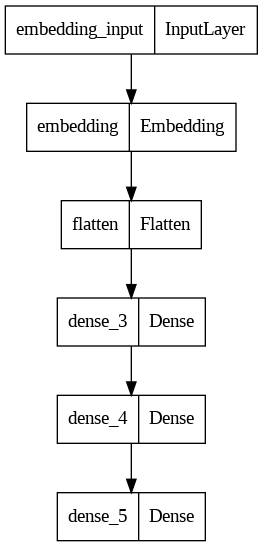

In [45]:
from keras.utils import plot_model
plot_model(model)

In [46]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(train_padded_docs,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(validation_padded_docs, y_validation))

Epoch 1/20
12/12 [==============================] - 1s 46ms/step - loss: 0.6754 - accuracy: 0.5708 - val_loss: 0.6582 - val_accuracy: 0.5791
Epoch 2/20
12/12 [==============================] - 0s 19ms/step - loss: 0.6123 - accuracy: 0.6911 - val_loss: 0.6213 - val_accuracy: 0.6612
Epoch 3/20
12/12 [==============================] - 0s 20ms/step - loss: 0.5126 - accuracy: 0.8338 - val_loss: 0.5616 - val_accuracy: 0.7439
Epoch 4/20
12/12 [==============================] - 0s 19ms/step - loss: 0.3977 - accuracy: 0.8982 - val_loss: 0.5420 - val_accuracy: 0.7538
Epoch 5/20
12/12 [==============================] - 0s 20ms/step - loss: 0.2972 - accuracy: 0.9271 - val_loss: 0.5147 - val_accuracy: 0.7669
Epoch 6/20
12/12 [==============================] - 0s 20ms/step - loss: 0.2171 - accuracy: 0.9489 - val_loss: 0.5157 - val_accuracy: 0.7643
Epoch 7/20
12/12 [==============================] - 0s 21ms/step - loss: 0.1562 - accuracy: 0.9596 - val_loss: 0.5285 - val_accuracy: 0.7708
Epoch 8/20
12

<a id="6.2.3"></a> <br>

##### Training VS Validation

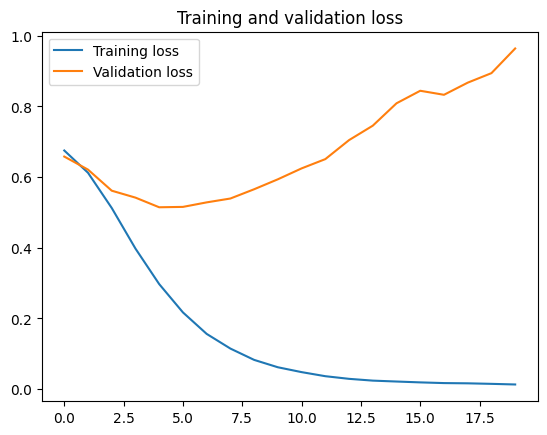

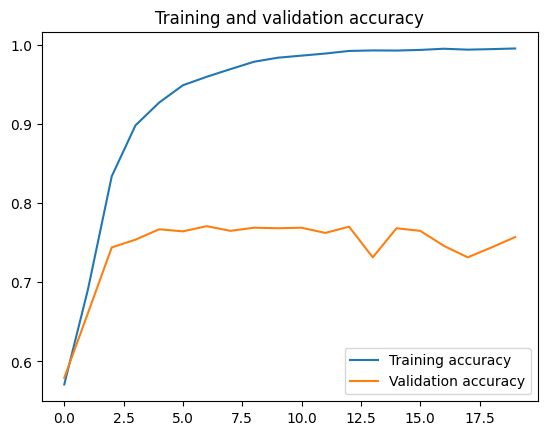

In [48]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

<a id="6.2.4"></a> <br>

##### Save Model

In [49]:
model.save('/content/bow_vectors.h5')

<a id="6.2.5"></a> <br>

##### Save Performance

In [50]:
model_name = 'BOW Vectors'
models_dict[model_name] = '/content/bow_vectors.h5'

train_loss, train_accuracy = model.evaluate(train_padded_docs, y_train)
validation_loss, validation_accuracy = model.evaluate(validation_padded_docs, y_validation)

evaluation = pd.DataFrame({
                          'Model' : [model_name],
                          'Train' : [train_accuracy],
                          'Validation' : [validation_accuracy]
                        })

evaluation_df = pd.concat([evaluation_df, evaluation], ignore_index=True)

48/48 [==============================] - 0s 2ms/step - loss: 0.9642 - accuracy: 0.7571


<a id="6.3"></a> <br>

## 6.3 LSTM


<a id="6.3.1"></a> <br>

##### Building Model

In [51]:
c_latent_factors = 32

model = models.Sequential()
model.add(layers.Embedding(vocab_size+1, c_latent_factors, input_length=max_length))
model.add(layers.LSTM(32, dropout=0.2, recurrent_dropout=0.4))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 23, 32)            518304    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 527,441
Trainable params: 527,441
Non-tr

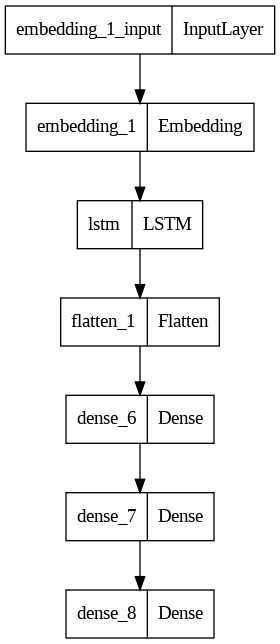

In [53]:
from keras.utils import plot_model
plot_model(model)

In [54]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
history = model.fit(train_padded_docs,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(validation_padded_docs, y_validation))

Epoch 1/20
12/12 [==============================] - 6s 193ms/step - loss: 0.6870 - accuracy: 0.5578 - val_loss: 0.6810 - val_accuracy: 0.5706
Epoch 2/20
12/12 [==============================] - 2s 195ms/step - loss: 0.6399 - accuracy: 0.6213 - val_loss: 0.6155 - val_accuracy: 0.7137
Epoch 3/20
12/12 [==============================] - 1s 117ms/step - loss: 0.4399 - accuracy: 0.8461 - val_loss: 0.5437 - val_accuracy: 0.7472
Epoch 4/20
12/12 [==============================] - 1s 114ms/step - loss: 0.3161 - accuracy: 0.8890 - val_loss: 0.5519 - val_accuracy: 0.7551
Epoch 5/20
12/12 [==============================] - 1s 114ms/step - loss: 0.2489 - accuracy: 0.9130 - val_loss: 0.5929 - val_accuracy: 0.7748
Epoch 6/20
12/12 [==============================] - 1s 114ms/step - loss: 0.1945 - accuracy: 0.9338 - val_loss: 0.6608 - val_accuracy: 0.7781
Epoch 7/20
12/12 [==============================] - 1s 115ms/step - loss: 0.1538 - accuracy: 0.9484 - val_loss: 0.7214 - val_accuracy: 0.7610
Epoch 

<a id="6.3.2"></a> <br>

##### Training VS Validation

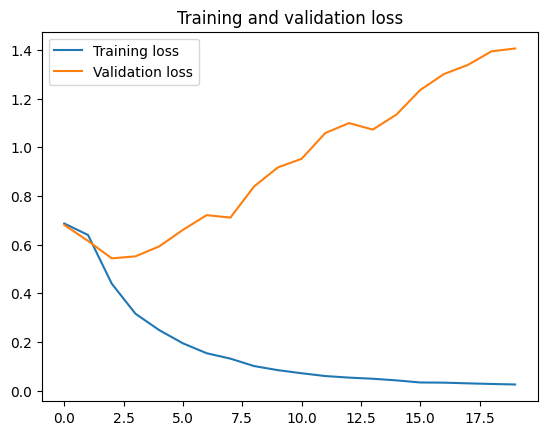

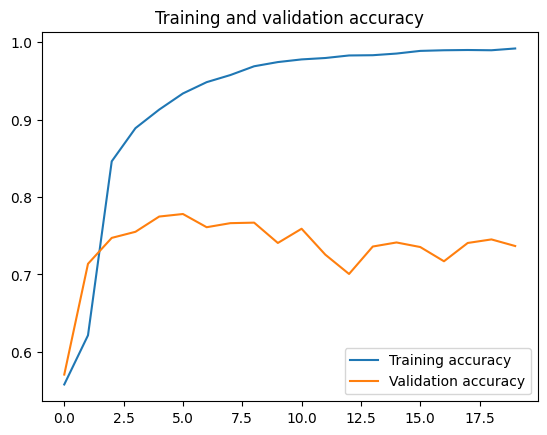

In [56]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

<a id="6.3.3"></a> <br>

##### Save Model

In [57]:
model.save('/content/lstm.h5')

<a id="6.3.4"></a> <br>

##### Save Performance

In [58]:
model_name = 'LSTM'
models_dict[model_name] = '/content/lstm.h5'

train_loss, train_accuracy = model.evaluate(train_padded_docs, y_train)
validation_loss, validation_accuracy = model.evaluate(validation_padded_docs, y_validation)

evaluation = pd.DataFrame({
                          'Model' : [model_name],
                          'Train' : [train_accuracy],
                          'Validation' : [validation_accuracy]
                        })

evaluation_df = pd.concat([evaluation_df, evaluation], ignore_index=True)

48/48 [==============================] - 0s 6ms/step - loss: 1.4063 - accuracy: 0.7367


<a id="6.4"></a> <br>

## 6.4 GRU


<a id="6.4.1"></a> <br>

##### Building Model

In [59]:
c_latent_factors = 32

model = models.Sequential()
model.add(layers.Embedding(vocab_size+1, c_latent_factors, input_length=max_length))
model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.4))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 23, 32)            518304    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 525,457
Trainable params: 525,457
Non-tr

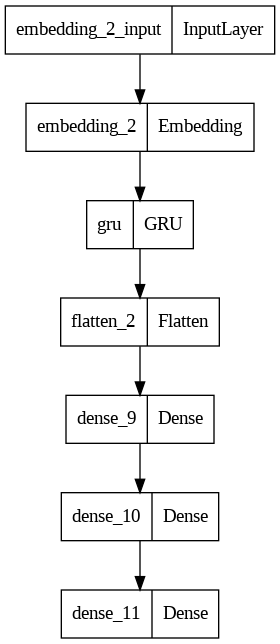

In [61]:
from keras.utils import plot_model
plot_model(model)

In [62]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [63]:
history = model.fit(train_padded_docs,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(validation_padded_docs, y_validation))

Epoch 1/20
12/12 [==============================] - 5s 143ms/step - loss: 0.6873 - accuracy: 0.5591 - val_loss: 0.6832 - val_accuracy: 0.5706
Epoch 2/20
12/12 [==============================] - 1s 97ms/step - loss: 0.6833 - accuracy: 0.5703 - val_loss: 0.6832 - val_accuracy: 0.5706
Epoch 3/20
12/12 [==============================] - 1s 118ms/step - loss: 0.6830 - accuracy: 0.5703 - val_loss: 0.6828 - val_accuracy: 0.5706
Epoch 4/20
12/12 [==============================] - 2s 173ms/step - loss: 0.6821 - accuracy: 0.5703 - val_loss: 0.6820 - val_accuracy: 0.5706
Epoch 5/20
12/12 [==============================] - 1s 108ms/step - loss: 0.6625 - accuracy: 0.5703 - val_loss: 0.6208 - val_accuracy: 0.5712
Epoch 6/20
12/12 [==============================] - 1s 94ms/step - loss: 0.5057 - accuracy: 0.7808 - val_loss: 0.5962 - val_accuracy: 0.7656
Epoch 7/20
12/12 [==============================] - 2s 168ms/step - loss: 0.3904 - accuracy: 0.8757 - val_loss: 0.5556 - val_accuracy: 0.7551
Epoch 8/

<a id="6.4.2"></a> <br>

##### Training VS Validation

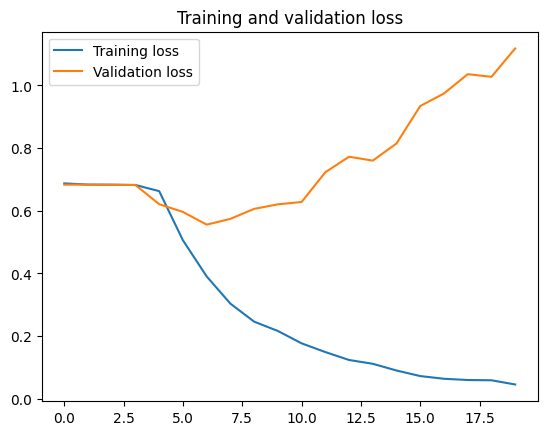

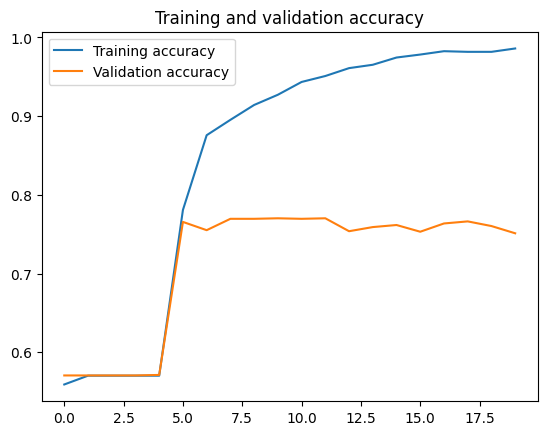

In [64]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

<a id="6.4.3"></a> <br>

##### Save Model

In [65]:
model.save('/content/gru.h5')

<a id="6.4.4"></a> <br>

##### Save Performance

In [66]:
model_name = 'GRU'
models_dict[model_name] = '/content/gru.h5'

train_loss, train_accuracy = model.evaluate(train_padded_docs, y_train)
validation_loss, validation_accuracy = model.evaluate(validation_padded_docs, y_validation)

evaluation = pd.DataFrame({
                          'Model' : [model_name],
                          'Train' : [train_accuracy],
                          'Validation' : [validation_accuracy]
                        })

evaluation_df = pd.concat([evaluation_df, evaluation], ignore_index=True)

48/48 [==============================] - 0s 9ms/step - loss: 1.1177 - accuracy: 0.7511


<a id="7"></a> <br>

# 7. Evaluation
([Go to top](#top))

In [67]:
evaluation_df

,Model,Train,Validation
0,BOW,0.991297,0.751806
1,BOW Vectors,0.996223,0.757058
2,LSTM,0.996059,0.736704
3,GRU,0.990969,0.751149


In [68]:
from keras.models import load_model

# Get best model according to validation score.
best_model = evaluation_df[evaluation_df['Validation'] == evaluation_df['Validation'].max()]['Model'].values[0]

In [69]:
best_model

'BOW Vectors'

In [70]:
model = load_model(models_dict[best_model])

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 32)            518304    
                                                                 
 flatten (Flatten)           (None, 736)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                11792     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 530,385
Trainable params: 530,385
Non-trainable params: 0
_________________________________________________________________


<a id="8"></a> <br>

# 8. Submission File Generation
([Go to top](#top))

In [72]:
test_data = pd.read_csv('/content/test.csv')
test_data.shape

(3263, 4)

In [73]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [74]:
# Text preprocessing utilized during training

test_data['clean text'] = test_data['text'].apply(normalize_text)
test_data.head()

,id,keyword,location,text,clean text
0,0,NaN,NaN,Just happened a terrible car crash,happen terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",hear earthquake different city stay safe everyone
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose flee across street...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse light spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


In [75]:
# Get the appropriate preparation based on model

if best_model == 'BOW':
  X_test = vectorizer.transform(test_data['clean text'].values)
  X_test = X_test.toarray()

else:
  X_test = tokenizer.texts_to_sequences(test_data['clean text'].values)
  X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [76]:
predictions = model.predict(X_test).round()

102/102 [==============================] - 0s 2ms/step


In [77]:
submission = pd.read_csv('/content/sample_submission.csv')
submission['target'] = np.round(predictions).astype('int')
submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1


In [78]:
submission.to_csv('/content/submission.csv', index=False)